# Problem statement: Sentiment Analysis of review into positive,negative and neutral sentiment

In [1]:
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Data collection using amazon review exporter

In [2]:
earphone= pd.read_csv('Reviews_Earphone.csv')
earphone

,Text,Title,Rating
0,Warning: My review is purely my opinion. I'll ...,"They got the spirit right, but somewhere, the ...",1
1,I loved the product in every term .... design....,Fully satisfied ☺️,5
2,Good performance noise I ithink these is tr...,Sprr,5
3,Call quality and connectivity is good. Bass an...,Must read before buying,3
4,"Don't just go for touch gimmick, awful product...",Awful product!!,1
...,...,...,...
2000,Overall niceSound and bass is low not expected...,Noise and bass should more loud,4
2001,Ok product,Ok,3
2002,It’s not Connecting and also voice is not clear,It’s not working,1
2003,The best quality of product & sound quality r ...,Sound quality,5


In [3]:
messages = earphone.copy()

In [4]:
earphone.Text[200]

'Very Very Very poor quality and poor sound and poor charging issue so,  I think Very poor this product and I am purchasing this product after warranty  2 months completed but issue not resolve by noise  and ticket was closed by noise team , Very bad experience in noise. I suggested no one purchase any product in noise  because  warranty related  very bad experience noise.'

Data Cleaning

In [5]:
#Checking null values
earphone.isna().sum()

Text      0
Title     0
Rating    0
dtype: int64

In [6]:
#checking for duplicated values
earphone.duplicated().sum()

0

EDA

In [7]:
earphone.describe()
#It is observed from the below figures that most of customers had given positive rating

,Rating
count,2005.000000
mean,3.288279
std,1.625854
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
earphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2005 non-null   object
 1   Title   2005 non-null   object
 2   Rating  2005 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.1+ KB


In [9]:
#Checking whether data is balanced or not
earphone.Rating.value_counts()

5    669
1    546
4    468
3    186
2    136
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x215723cc520>,
 [Text(0.5490045611829587, 0.9532019680006474, '5'),
  Text(-1.0802892642153075, 0.20730437916539426, '1'),
  Text(-0.18780596242126255, -1.0838491225622797, '4'),
  Text(0.8287025415728176, -0.7233616644464598, '3'),
  Text(1.0751190243769555, -0.23263508639657896, '2')],
 [Text(0.2994570333725229, 0.5199283461821712, '33.37'),
  Text(-0.5892486895719858, 0.11307511590839686, '27.23'),
  Text(-0.1024396158661432, -0.5911904304885162, '23.34'),
  Text(0.45201956813062777, -0.3945609078798871, '9.28'),
  Text(0.5864285587510666, -0.12689186530722488, '6.78')])

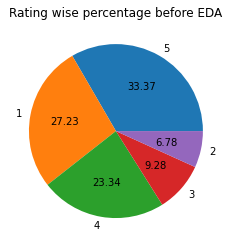

In [10]:
#plotting pie chart for rating on percentage
import matplotlib.pyplot as plt
plt.title('Rating wise percentage before EDA')
plt.pie(earphone.Rating.value_counts(),labels=[5,1,4,3,2],autopct='%0.2f')

Text preprocessing

In [11]:
lematizer = WordNetLemmatizer()
corpus =[]
for i in range(len(earphone.Text)):
    review = re.sub('[^a-zA-Z]',' ',earphone.Text[i])
    review = review.lower()
    review = review.split()
    review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
corpus

['warning review purely opinion list issue faced one well informed purchasing non returnable product really good earphone paper star making feature loaded dual pairing better quickswitch stay connected device time great battery life touch control first range incoming call vibrationsounds like complete package well faced made device feel useless bad sound quality people say audio could subjective certain music sound bad really care well check next point earbuds fancy premium look photo painful put real life half hour usage found throwing away bud large rubber hook hard contrastingly realme bud wireless year old even feel wearing long time touch button gimmick sometimes work sometimes overall got spirit right paper offering pretty good feature cost cutting lack comfort research left wanting hey earphone sound bad hurt ear good fancy feature worth',
 'loved product every term design built quality sound battery suggest everyone go thinking another',
 'good performance noise ithink trending

In [13]:
earphone['Text'] =pd.DataFrame(corpus)

In [14]:
earphone

,Text,Title,Rating
0,warning review purely opinion list issue faced...,"They got the spirit right, but somewhere, the ...",1
1,loved product every term design built quality ...,Fully satisfied ☺️,5
2,good performance noise ithink trending better ...,Sprr,5
3,call quality connectivity good bass sound qual...,Must read before buying,3
4,go touch gimmick awful product build ok ok goo...,Awful product!!,1
...,...,...,...
2000,overall nicesound bass low expected like thiss...,Noise and bass should more loud,4
2001,ok product,Ok,3
2002,connecting also voice clear,It’s not working,1
2003,best quality product sound quality r nice,Sound quality,5


In [15]:
#Forming sentiment column based on the rating given
a1=[]
for i in range(len(earphone.Rating)):
    if earphone.Rating[i]==1:
        a1.append("Negative")
    elif earphone.Rating[i]==2:
        a1.append("Negative")
    elif earphone.Rating[i]==3:
        a1.append("Neutral")
    elif earphone.Rating[i]==4:
        a1.append("Positive")
    else:
        a1.append("Positive")

In [16]:
earphone["sentiment"]=pd.DataFrame(a1)

In [17]:
earphone.sentiment.value_counts()

Positive    1137
Negative     682
Neutral      186
Name: sentiment, dtype: int64

sentiment extraction using textblob

In [18]:
earphone['polarity']=earphone.Text.apply(lambda x: TextBlob(x).sentiment.polarity)
earphone['subjectivity']=earphone.Text.apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [19]:
earphone

,Text,Title,Rating,sentiment,polarity,subjectivity
0,warning review purely opinion list issue faced...,"They got the spirit right, but somewhere, the ...",1,Negative,0.081298,0.449270
1,loved product every term design built quality ...,Fully satisfied ☺️,5,Positive,0.550000,0.600000
2,good performance noise ithink trending better ...,Sprr,5,Positive,0.287500,0.495833
3,call quality connectivity good bass sound qual...,Must read before buying,3,Neutral,0.243889,0.545000
4,go touch gimmick awful product build ok ok goo...,Awful product!!,1,Negative,0.212500,0.607292
...,...,...,...,...,...,...
2000,overall nicesound bass low expected like thiss...,Noise and bass should more loud,4,Positive,-0.030000,0.400000
2001,ok product,Ok,3,Neutral,0.500000,0.500000
2002,connecting also voice clear,It’s not working,1,Negative,0.100000,0.383333
2003,best quality product sound quality r nice,Sound quality,5,Positive,0.666667,0.566667


In [20]:
a=[]
for i in range(len(earphone.polarity)):
    if earphone.polarity[i]<0:
        a.append("Negative")
    elif earphone.polarity[i]==0:
        a.append("Neutral")
    else:
        a.append("Positive")

In [21]:
earphone["Textblob_sentiment"]=pd.DataFrame(a)

In [22]:
earphone

,Text,Title,Rating,sentiment,polarity,subjectivity,Textblob_sentiment
0,warning review purely opinion list issue faced...,"They got the spirit right, but somewhere, the ...",1,Negative,0.081298,0.449270,Positive
1,loved product every term design built quality ...,Fully satisfied ☺️,5,Positive,0.550000,0.600000,Positive
2,good performance noise ithink trending better ...,Sprr,5,Positive,0.287500,0.495833,Positive
3,call quality connectivity good bass sound qual...,Must read before buying,3,Neutral,0.243889,0.545000,Positive
4,go touch gimmick awful product build ok ok goo...,Awful product!!,1,Negative,0.212500,0.607292,Positive
...,...,...,...,...,...,...,...
2000,overall nicesound bass low expected like thiss...,Noise and bass should more loud,4,Positive,-0.030000,0.400000,Negative
2001,ok product,Ok,3,Neutral,0.500000,0.500000,Positive
2002,connecting also voice clear,It’s not working,1,Negative,0.100000,0.383333,Positive
2003,best quality product sound quality r nice,Sound quality,5,Positive,0.666667,0.566667,Positive


In [23]:
earphone.Textblob_sentiment.value_counts()

Positive    1441
Negative     329
Neutral      235
Name: Textblob_sentiment, dtype: int64

sentiment analysis using vader

In [24]:
obj= SentimentIntensityAnalyzer()
obj.polarity_scores("good")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [25]:
x2= []
for i in range(len(earphone.Text)):
    x1= obj.polarity_scores(earphone.Text[i])
    x2.append(x1)

In [26]:
x2

[{'neg': 0.158, 'neu': 0.61, 'pos': 0.232, 'compound': 0.8949},
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5994},
 {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.8126},
 {'neg': 0.186, 'neu': 0.679, 'pos': 0.135, 'compound': -0.5859},
 {'neg': 0.117, 'neu': 0.554, 'pos': 0.329, 'compound': 0.9694},
 {'neg': 0.415, 'neu': 0.585, 'pos': 0.0, 'compound': -0.8176},
 {'neg': 0.043, 'neu': 0.904, 'pos': 0.052, 'compound': 0.128},
 {'neg': 0.258, 'neu': 0.69, 'pos': 0.053, 'compound': -0.8834},
 {'neg': 0.086, 'neu': 0.59, 'pos': 0.324, 'compound': 0.936},
 {'neg': 0.194, 'neu': 0.607, 'pos': 0.199, 'compound': -0.2023},
 {'neg': 0.102, 'neu': 0.496, 'pos': 0.402, 'compound': 0.8779},
 {'neg': 0.0, 'neu': 0.395, 'pos': 0.605, 'compound': 0.987},
 {'neg': 0.109, 'neu': 0.54, 'pos': 0.351, 'compound': 0.9595},
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767},
 {'neg': 0.143, 'neu': 0.533, 'pos': 0.323, 'compound': 0.7506},
 {'neg': 0.167, 'neu': 0.79, 'pos': 0

In [27]:
pd.DataFrame(x2)

,neg,neu,pos,compound
0,0.158,0.610,0.232,0.8949
1,0.000,0.769,0.231,0.5994
2,0.000,0.669,0.331,0.8126
3,0.186,0.679,0.135,-0.5859
4,0.117,0.554,0.329,0.9694
...,...,...,...,...
2000,0.198,0.566,0.236,0.1027
2001,0.000,0.312,0.688,0.2960
2002,0.000,0.536,0.464,0.3818
2003,0.000,0.417,0.583,0.7906


In [28]:
earphone["vader_compound"]=pd.DataFrame(x2)["compound"]

In [29]:
earphone

,Text,Title,Rating,sentiment,polarity,subjectivity,Textblob_sentiment,vader_compound
0,warning review purely opinion list issue faced...,"They got the spirit right, but somewhere, the ...",1,Negative,0.081298,0.449270,Positive,0.8949
1,loved product every term design built quality ...,Fully satisfied ☺️,5,Positive,0.550000,0.600000,Positive,0.5994
2,good performance noise ithink trending better ...,Sprr,5,Positive,0.287500,0.495833,Positive,0.8126
3,call quality connectivity good bass sound qual...,Must read before buying,3,Neutral,0.243889,0.545000,Positive,-0.5859
4,go touch gimmick awful product build ok ok goo...,Awful product!!,1,Negative,0.212500,0.607292,Positive,0.9694
...,...,...,...,...,...,...,...,...
2000,overall nicesound bass low expected like thiss...,Noise and bass should more loud,4,Positive,-0.030000,0.400000,Negative,0.1027
2001,ok product,Ok,3,Neutral,0.500000,0.500000,Positive,0.2960
2002,connecting also voice clear,It’s not working,1,Negative,0.100000,0.383333,Positive,0.3818
2003,best quality product sound quality r nice,Sound quality,5,Positive,0.666667,0.566667,Positive,0.7906


In [30]:
b=[]
for i in range(len(earphone.vader_compound)):
    if earphone.vader_compound[i]<0:
        b.append("Negative")
    elif earphone.vader_compound[i]>0:
        b.append("Positive")
    else:
        b.append("Neutral")

In [31]:
earphone["vader_sentiment"]= pd.DataFrame(b)
earphone

,Text,Title,Rating,sentiment,polarity,subjectivity,Textblob_sentiment,vader_compound,vader_sentiment
0,warning review purely opinion list issue faced...,"They got the spirit right, but somewhere, the ...",1,Negative,0.081298,0.449270,Positive,0.8949,Positive
1,loved product every term design built quality ...,Fully satisfied ☺️,5,Positive,0.550000,0.600000,Positive,0.5994,Positive
2,good performance noise ithink trending better ...,Sprr,5,Positive,0.287500,0.495833,Positive,0.8126,Positive
3,call quality connectivity good bass sound qual...,Must read before buying,3,Neutral,0.243889,0.545000,Positive,-0.5859,Negative
4,go touch gimmick awful product build ok ok goo...,Awful product!!,1,Negative,0.212500,0.607292,Positive,0.9694,Positive
...,...,...,...,...,...,...,...,...,...
2000,overall nicesound bass low expected like thiss...,Noise and bass should more loud,4,Positive,-0.030000,0.400000,Negative,0.1027,Positive
2001,ok product,Ok,3,Neutral,0.500000,0.500000,Positive,0.2960,Positive
2002,connecting also voice clear,It’s not working,1,Negative,0.100000,0.383333,Positive,0.3818,Positive
2003,best quality product sound quality r nice,Sound quality,5,Positive,0.666667,0.566667,Positive,0.7906,Positive


In [32]:
earphone.vader_sentiment.value_counts()

Positive    1363
Negative     468
Neutral      174
Name: vader_sentiment, dtype: int64

In [33]:
earphone[earphone.vader_sentiment=="Neutral"]

,Text,Title,Rating,sentiment,polarity,subjectivity,Textblob_sentiment,vader_compound,vader_sentiment
170,buy opinion,After 15 days ....right side sound not properl...,1,Negative,0.000000,0.000000,Neutral,0.0,Neutral
201,noise cancellation vibaretion,नाम बड़े और दर्शन छोटे,1,Negative,0.000000,0.000000,Neutral,0.0,Neutral
213,neckband big issue connectivity disconnect cal...,Connectivity issue,1,Negative,0.000000,0.100000,Neutral,0.0,Neutral
227,butten required cord finger touch use full cal...,Call vibration is unusable,2,Negative,0.350000,0.550000,Positive,0.0,Neutral
248,long time battery magnetic control call vibrat...,Ultimate Bluetooth Neckband🎧🥰,5,Positive,0.066667,0.433333,Positive,0.0,Neutral
...,...,...,...,...,...,...,...,...,...
1964,touch sensor working within month,Noise flair neckband,1,Negative,0.000000,0.000000,Neutral,0.0,Neutral
1969,working three month used,"Not working ""OFF"" when the both earphones are ...",3,Neutral,0.000000,0.000000,Neutral,0.0,Neutral
1973,quality goodpremium lookworth momey,Touch control sometimes call attended in gold ...,5,Positive,0.000000,0.000000,Neutral,0.0,Neutral
1980,,साउंड क्वालिटी बहुत ही खराब है म्यूजिक चलाने प...,1,Negative,0.000000,0.000000,Neutral,0.0,Neutral


In [34]:
earphone[(earphone.vader_sentiment=="Positive") & (earphone.Rating==1)]

,Text,Title,Rating,sentiment,polarity,subjectivity,Textblob_sentiment,vader_compound,vader_sentiment
0,warning review purely opinion list issue faced...,"They got the spirit right, but somewhere, the ...",1,Negative,0.081298,0.449270,Positive,0.8949,Positive
4,go touch gimmick awful product build ok ok goo...,Awful product!!,1,Negative,0.212500,0.607292,Positive,0.9694,Positive
6,mera first order product defect return product...,Best product & Sound,1,Negative,0.362121,0.462626,Positive,0.1280,Positive
20,con device get switched active usage power con...,Not worth it,1,Negative,0.344444,0.450000,Positive,0.8910,Positive
26,product gimmick amazon unlist right r neckband...,Total Garbage!!,1,Negative,0.014610,0.536580,Positive,0.5606,Positive
...,...,...,...,...,...,...,...,...,...
1965,user friendly quality,Unwanted spent,1,Negative,0.375000,0.500000,Positive,0.4939,Positive
1977,sound quality ok sharp bass treble balanced,"This is waste of money ,too many issues",1,Negative,0.156250,0.537500,Positive,0.2960,Positive
1986,satisfied noise bluetooth neckband replace,Poor Battery Life,1,Negative,0.500000,1.000000,Positive,0.4215,Positive
1988,like product sound quality good,Need to improve quality,1,Negative,0.550000,0.500000,Positive,0.6597,Positive


Label encoding and balancing the data i.e. doing EDA

In [35]:
earphone

,Text,Title,Rating,sentiment,polarity,subjectivity,Textblob_sentiment,vader_compound,vader_sentiment
0,warning review purely opinion list issue faced...,"They got the spirit right, but somewhere, the ...",1,Negative,0.081298,0.449270,Positive,0.8949,Positive
1,loved product every term design built quality ...,Fully satisfied ☺️,5,Positive,0.550000,0.600000,Positive,0.5994,Positive
2,good performance noise ithink trending better ...,Sprr,5,Positive,0.287500,0.495833,Positive,0.8126,Positive
3,call quality connectivity good bass sound qual...,Must read before buying,3,Neutral,0.243889,0.545000,Positive,-0.5859,Negative
4,go touch gimmick awful product build ok ok goo...,Awful product!!,1,Negative,0.212500,0.607292,Positive,0.9694,Positive
...,...,...,...,...,...,...,...,...,...
2000,overall nicesound bass low expected like thiss...,Noise and bass should more loud,4,Positive,-0.030000,0.400000,Negative,0.1027,Positive
2001,ok product,Ok,3,Neutral,0.500000,0.500000,Positive,0.2960,Positive
2002,connecting also voice clear,It’s not working,1,Negative,0.100000,0.383333,Positive,0.3818,Positive
2003,best quality product sound quality r nice,Sound quality,5,Positive,0.666667,0.566667,Positive,0.7906,Positive


In [36]:
label_encoder = LabelEncoder()
earphone['sentiment']=label_encoder.fit_transform(earphone.sentiment)
earphone['vader_sentiment']=label_encoder.fit_transform(earphone.vader_sentiment)
earphone['Textblob_sentiment']=label_encoder.fit_transform(earphone.Textblob_sentiment)

In [37]:
#vadar sentiment
earphone.vader_sentiment.value_counts() #2 for positive, 0 for negative and 1 for neutral

2    1363
0     468
1     174
Name: vader_sentiment, dtype: int64

In [38]:
#textblob sentiment
earphone.Textblob_sentiment.value_counts() #2 for positive, 0 for negative and 1 for neutral

2    1441
0     329
1     235
Name: Textblob_sentiment, dtype: int64

In [39]:
#sentiment based on rating
earphone.sentiment.value_counts() #2 for positive, 0 for negative and 1 for neutral

2    1137
0     682
1     186
Name: sentiment, dtype: int64

In [40]:
earphone[['sentiment','Textblob_sentiment','vader_sentiment']]

,sentiment,Textblob_sentiment,vader_sentiment
0,0,2,2
1,2,2,2
2,2,2,2
3,1,2,0
4,0,2,2
...,...,...,...
2000,2,0,2
2001,1,2,2
2002,0,2,2
2003,2,2,2


## text to numbers

### model building using bag of words

In [41]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [42]:
x =cv.fit_transform(earphone.Text).toarray()

In [43]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
x = pd.DataFrame(x,columns=cv.get_feature_names_out())
x

,aa,aaaye,aac,aadhe,aaj,aana,aane,aap,aapko,aata,...,yesterday,yet,yo,youtoube,youtube,yr,zebronics,zee,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y = earphone.sentiment
y

0       0
1       2
2       2
3       1
4       0
       ..
2000    2
2001    1
2002    0
2003    2
2004    2
Name: sentiment, Length: 2005, dtype: int32

### balancing the data

([<matplotlib.patches.Wedge at 0x1a0225d45e0>,
 [Text(-0.2301075553475852, 1.075662824946534, '2'),
  Text(-0.08866751061826494, -1.096420572846369, '0'),
  Text(1.0536143292698303, -0.3160646218058672, '1')],
 [Text(-0.12551321200777374, 0.586725177243564, '56.71'),
  Text(-0.04836409670087178, -0.5980475851889285, '34.01'),
  Text(0.574698725056271, -0.1723988846213821, '9.28')])

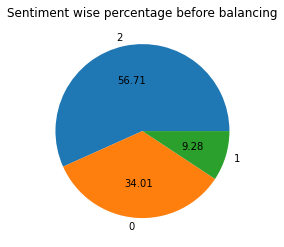

In [46]:
#plotting pie chart for rating on percentage
import matplotlib.pyplot as plt
plt.title('Sentiment wise percentage before balancing')
plt.pie(y.value_counts(),labels=[2,0,1],autopct='%0.2f')

In [47]:
y.value_counts()

2    1137
0     682
1     186
Name: sentiment, dtype: int64

### Undersampling with CV

In [48]:
type(x)

pandas.core.frame.DataFrame

In [49]:
nm= NearMiss()

In [50]:
xnew,ynew= nm.fit_resample(x,y)

In [51]:
ynew.value_counts()

0    186
1    186
2    186
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x1a023bb90d0>,
 [Text(0.5499999702695115, 0.9526279613277875, '2'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '1'),
  Text(0.5500001486524352, -0.9526278583383436, '0')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33')])

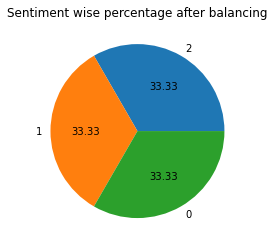

In [52]:
#plotting pie chart for rating on percentage
import matplotlib.pyplot as plt
plt.title('Sentiment wise percentage after balancing')
plt.pie(ynew.value_counts(),labels=[2,1,0],autopct='%0.2f')

### data validation method

In [53]:
#Decing the data validation method first using train test split
results_log= []
for i in (0.1,0.18,0.19,0.2,0.3,0.4,0.5):
    xtrain,xtest,ytrain,ytest = train_test_split(xnew,ynew,test_size=i,random_state=5)
    log = LogisticRegression()
    log_model = log.fit(xtrain,ytrain)
    ypred_log= log_model.predict(xtest)
    result1= accuracy_score(ytest,ypred_log)
    results_log.append(result1)
results_log
#As we are getting highest accuracy for the 0.2 test_size we are choosing the same 

[0.6964285714285714,
 0.6336633663366337,
 0.6261682242990654,
 0.6428571428571429,
 0.5952380952380952,
 0.6428571428571429,
 0.6093189964157706]

In [54]:
test = [0.1,0.18,0.19,0.2,0.3,0.4,0.5]
Best_test_size =pd.DataFrame(test)
Best_test_size["test_accuracy"] = results_log
Best_test_size= Best_test_size.rename(columns={0:"test_size"})
Best_test_size

,test_size,test_accuracy
0,0.10,0.696429
1,0.18,0.633663
2,0.19,0.626168
3,0.20,0.642857
4,0.30,0.595238
5,0.40,0.642857
6,0.50,0.609319


In [55]:
cs_results=[]
for i in range(3,17):
    results = cross_val_score(log_model,xnew,ynew,cv=i).mean()
    results=results*100
    cs_results.append(results)
cs_results

[66.84587813620072,
 67.72225077081193,
 67.17664092664091,
 69.53405017921148,
 67.19032549728752,
 68.4368530020704,
 68.27956989247312,
 68.62337662337661,
 67.52228163992868,
 67.4722479185939,
 66.82426101030752,
 66.98717948717949,
 67.1692745376956,
 67.16386554621849]

In [56]:
split = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
Best_cross_value =pd.DataFrame(split)
Best_cross_value["test_accuracy"] = cs_results
Best_cross_value= Best_cross_value.rename(columns={0:"cross_value"})
Best_cross_value

,cross_value,test_accuracy
0,3,66.845878
1,4,67.722251
2,5,67.176641
3,6,69.534050
4,7,67.190325
5,8,68.436853
6,9,68.279570
7,10,68.623377
8,11,67.522282
9,12,67.472248


In [57]:
#so we are getting highest accuracy using cross validation so we are choosing cross validation for data validation

In [58]:
#using naive bayes model
nb = GaussianNB()
results_nb = cross_val_score(nb,xnew,ynew,cv=6).mean()
print(results_nb)
#so we are getting around 57% accuracy for this naive bayes model

0.5734767025089605


In [59]:
#using logistic regression model
log = LogisticRegression()
results_log = cross_val_score(log,xnew,ynew,cv=6).mean()
print(results_log)
#so we are getting around 70% accuracy for this logistic regression model

0.6953405017921147


In [60]:
#using decision tree classifier model
dt = DecisionTreeClassifier()
results_dt = cross_val_score(dt,xnew,ynew,cv=6).mean()
print(results_dt)
#so we are getting around 51% accuracy for this decision tree model

0.5089605734767025


In [61]:
#using multinominal naive bayes model
mnb = MultinomialNB()
results_mnb = cross_val_score(mnb,xnew,ynew,cv=6).mean()
print(results_mnb)
#so we are getting around 55% accuracy for this multinominal naive bayes model

0.5448028673835126


In [62]:
column_names = ["naive_bayes","logistic_regression","decision_tree","multinominal_naivebayes"]
test_accuracy =[results_nb,results_log,results_dt,results_mnb]
Accuracy_comparison= pd.DataFrame(column_names)
Accuracy_comparison['test_accuracy'] = test_accuracy
Accuracy_comparison= Accuracy_comparison.rename(columns={0:'Model_Name'})
Accuracy_comparison

,Model_Name,test_accuracy
0,naive_bayes,0.573477
1,logistic_regression,0.695341
2,decision_tree,0.508961
3,multinominal_naivebayes,0.544803


In [63]:
test_accuracy

[0.5734767025089605,
 0.6953405017921147,
 0.5089605734767025,
 0.5448028673835126]

In [64]:
xnew.shape

(558, 3513)

## using oversampling method

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
sm= SMOTE(random_state=15)

In [67]:
xnew2,ynew2=sm.fit_resample(x,y)

In [68]:
ynew2.value_counts()

0    1137
2    1137
1    1137
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x1a025165a90>,
 [Text(0.5499999702695115, 0.9526279613277875, '2'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '1'),
  Text(0.5500001486524352, -0.9526278583383436, '0')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33')])

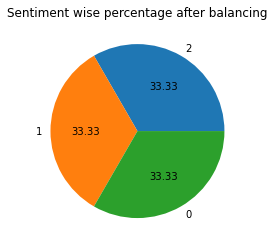

In [69]:
#plotting pie chart for rating on percentage
import matplotlib.pyplot as plt
plt.title('Sentiment wise percentage after balancing')
plt.pie(ynew2.value_counts(),labels=[2,1,0],autopct='%0.2f')

### data validation method

In [70]:
#Decing the data validation method first using train test split
results_log= []
for i in (0.1,0.18,0.19,0.2,0.3,0.4,0.5):
    xtrain,xtest,ytrain,ytest = train_test_split(xnew2,ynew2,test_size=i,random_state=5)
    log = LogisticRegression(max_iter=4000)
    log_model = log.fit(xtrain,ytrain)
    ypred_log= log_model.predict(xtest)
    result1= accuracy_score(ytest,ypred_log)
    results_log.append(result1)
results_log
#As we are getting highest accuracy for the 0.3 test_size we are choosing the same 

[0.7368421052631579,
 0.7247557003257329,
 0.7226502311248074,
 0.7320644216691069,
 0.744140625,
 0.7362637362637363,
 0.731535756154748]

In [71]:
test = [0.1,0.18,0.19,0.2,0.3,0.4,0.5]
Best_test_size =pd.DataFrame(test)
Best_test_size["test_accuracy"] = results_log
Best_test_size= Best_test_size.rename(columns={0:"test_size"})
Best_test_size

,test_size,test_accuracy
0,0.10,0.736842
1,0.18,0.724756
2,0.19,0.722650
3,0.20,0.732064
4,0.30,0.744141
5,0.40,0.736264
6,0.50,0.731536


In [76]:
log = LogisticRegression(max_iter=5000)
cs_results=[]
for i in range(3,17):
    results = cross_val_score(log,xnew2,ynew2,cv=i).mean()
    results=results*100
    cs_results.append(results)
cs_results

[69.80357666373497,
 72.1474607708777,
 72.15115305513453,
 72.17685875062912,
 72.73652434010262,
 73.17456652483204,
 72.99912049252418,
 72.82733961002214,
 73.09115425597118,
 73.03053702330944,
 73.31838915445569,
 73.22669403725871,
 73.49421645155473,
 73.73702887104558]

In [77]:
split = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
Best_cross_value =pd.DataFrame(split)
Best_cross_value["test_accuracy"] = cs_results
Best_cross_value= Best_cross_value.rename(columns={0:"cross_value"})
Best_cross_value

,cross_value,test_accuracy
0,3,69.803577
1,4,72.147461
2,5,72.151153
3,6,72.176859
4,7,72.736524
5,8,73.174567
6,9,72.999120
7,10,72.827340
8,11,73.091154
9,12,73.030537


In [69]:
#so we are getting highest accuracy using train test split so we are choosing cross validation for data validation

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(xnew2,ynew2,test_size=0.3,random_state=5)

In [79]:
#using naive bayes model
nb = GaussianNB()
nb_model = nb.fit(xtrain,ytrain)
ypred_nb= nb_model.predict(xtest)
accuracy_score(ytest,ypred_nb)
print(classification_report(ytest,ypred_nb))
#so we are getting around 48% accuracy for this naive bayes model

              precision    recall  f1-score   support

           0       0.53      0.43      0.47       345
           1       0.53      0.90      0.67       341
           2       0.71      0.35      0.47       338

    accuracy                           0.56      1024
   macro avg       0.59      0.56      0.54      1024
weighted avg       0.59      0.56      0.54      1024



In [81]:
#using logistic regression model
log = LogisticRegression(max_iter=4000)
log_model = log.fit(xtrain,ytrain)
ypred_log= log_model.predict(xtest)
accuracy_score(ytest,ypred_log)
print(classification_report(ytest,ypred_log))
#so we are getting around 74% accuracy for this logistic regression model

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       345
           1       0.67      0.87      0.76       341
           2       0.81      0.72      0.77       338

    accuracy                           0.74      1024
   macro avg       0.76      0.74      0.74      1024
weighted avg       0.76      0.74      0.74      1024



In [82]:
#using decision tree classifier model
dt = DecisionTreeClassifier()
dt_model = dt.fit(xtrain,ytrain)
ypred_dt= dt_model.predict(xtest)
accuracy_score(ytest,ypred_dt)
print(classification_report(ytest,ypred_dt))
#so we are getting around 69% accuracy for this decision tree model

              precision    recall  f1-score   support

           0       0.66      0.61      0.64       345
           1       0.66      0.84      0.74       341
           2       0.75      0.60      0.67       338

    accuracy                           0.69      1024
   macro avg       0.69      0.69      0.68      1024
weighted avg       0.69      0.69      0.68      1024



In [83]:
#using multinominal naive bayes model
mnb = MultinomialNB()
mnb_model = mnb.fit(xtrain,ytrain)
ypred_mnb= mnb_model.predict(xtest)
print(accuracy_score(ytest,ypred_mnb))
print(classification_report(ytest,ypred_mnb))
#so we are getting around 64% accuracy for this multinominal naive bayes model

0.6357421875
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       345
           1       0.71      0.49      0.58       341
           2       0.53      0.81      0.64       338

    accuracy                           0.64      1024
   macro avg       0.67      0.64      0.63      1024
weighted avg       0.67      0.64      0.63      1024



In [84]:
column_names = ["naive_bayes","logistic_regression","decision_tree","multinominal_naivebayes"]
test_accuracy =[accuracy_score(ytest,ypred_nb),accuracy_score(ytest,ypred_log),accuracy_score(ytest,ypred_dt),accuracy_score(ytest,ypred_mnb)]
Accuracy_comparison= pd.DataFrame(column_names)
Accuracy_comparison['test_accuracy'] = test_accuracy
Accuracy_comparison= Accuracy_comparison.rename(columns={0:'Model_Name'})
Accuracy_comparison

,Model_Name,test_accuracy
0,naive_bayes,0.558594
1,logistic_regression,0.744141
2,decision_tree,0.685547
3,multinominal_naivebayes,0.635742


In [77]:
test_accuracy

[0.5734767025089605, 0.6953405017921147, 0.507168458781362, 0.5448028673835126]

In [87]:
ynew2.value_counts()

0    1137
2    1137
1    1137
Name: sentiment, dtype: int64

In [88]:
## As logistic regression is giving high accuracy we are going with that

## Model using tfidf vectorizer

In [41]:
tfidf = TfidfVectorizer()
x= tfidf.fit_transform(earphone.Text)
x

<2005x3513 sparse matrix of type '<class 'numpy.float64'>'
	with 25386 stored elements in Compressed Sparse Row format>

In [42]:
y = earphone.sentiment
y

0       0
1       2
2       2
3       1
4       0
       ..
2000    2
2001    1
2002    0
2003    2
2004    2
Name: sentiment, Length: 2005, dtype: int32

In [43]:
y.value_counts()

2    1137
0     682
1     186
Name: sentiment, dtype: int64

### balancing the data

([<matplotlib.patches.Wedge at 0x2157780b4f0>,
 [Text(-0.2301075553475852, 1.075662824946534, '2'),
  Text(-0.08866751061826494, -1.096420572846369, '0'),
  Text(1.0536143292698303, -0.3160646218058672, '1')],
 [Text(-0.12551321200777374, 0.586725177243564, '56.71'),
  Text(-0.04836409670087178, -0.5980475851889285, '34.01'),
  Text(0.574698725056271, -0.1723988846213821, '9.28')])

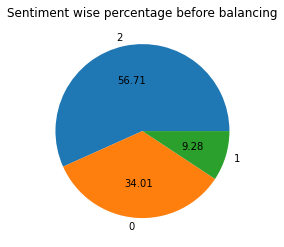

In [44]:
#plotting pie chart for rating on percentage
import matplotlib.pyplot as plt
plt.title('Sentiment wise percentage before balancing')
plt.pie(y.value_counts(),labels=[2,0,1],autopct='%0.2f')

In [45]:
y.value_counts()

2    1137
0     682
1     186
Name: sentiment, dtype: int64

### Undersampling with tfidf

In [48]:
type(x)

scipy.sparse.csr.csr_matrix

In [49]:
nm= NearMiss()

In [50]:
xnew3,ynew3= nm.fit_resample(x,y)

In [51]:
ynew3.value_counts()

0    186
1    186
2    186
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x2445ae85940>,
 [Text(0.5499999702695115, 0.9526279613277875, '2'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '1'),
  Text(0.5500001486524352, -0.9526278583383436, '0')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33')])

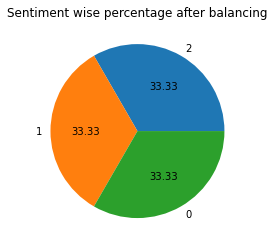

In [52]:
#plotting pie chart for rating on percentage
import matplotlib.pyplot as plt
plt.title('Sentiment wise percentage after balancing')
plt.pie(ynew3.value_counts(),labels=[2,1,0],autopct='%0.2f')

### data validation method

In [53]:
#Decing the data validation method first using train test split
results_log= []
for i in (0.1,0.18,0.19,0.2,0.3,0.4,0.5):
    xtrain,xtest,ytrain,ytest = train_test_split(xnew3,ynew3,test_size=i,random_state=5)
    log = LogisticRegression()
    log_model = log.fit(xtrain,ytrain)
    ypred_log= log_model.predict(xtest)
    result1= accuracy_score(ytest,ypred_log)
    results_log.append(result1)
results_log
#As we are getting highest accuracy for the 0.1 test_size we are choosing the same 

[0.6607142857142857,
 0.6435643564356436,
 0.6448598130841121,
 0.6339285714285714,
 0.625,
 0.6383928571428571,
 0.6057347670250897]

In [54]:
test = [0.1,0.18,0.19,0.2,0.3,0.4,0.5]
Best_test_size =pd.DataFrame(test)
Best_test_size["test_accuracy"] = results_log
Best_test_size= Best_test_size.rename(columns={0:"test_size"})
Best_test_size

,test_size,test_accuracy
0,0.10,0.660714
1,0.18,0.643564
2,0.19,0.644860
3,0.20,0.633929
4,0.30,0.625000
5,0.40,0.638393
6,0.50,0.605735


In [55]:
cs_results=[]
for i in range(3,17):
    results = cross_val_score(log,xnew3,ynew3,cv=i).mean()
    results=results*100
    cs_results.append(results)
cs_results

[57.70609318996417,
 59.48612538540596,
 62.348777348777354,
 62.00716845878136,
 61.45343580470163,
 61.262939958592135,
 61.648745519713266,
 62.34090909090908,
 61.80392156862745,
 63.201510946654324,
 62.35198909617515,
 62.335164835164825,
 62.16690374585111,
 62.331932773109244]

In [56]:
split = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
Best_cross_value =pd.DataFrame(split)
Best_cross_value["test_accuracy"] = cs_results
Best_cross_value= Best_cross_value.rename(columns={0:"cross_value"})
Best_cross_value

,cross_value,test_accuracy
0,3,57.706093
1,4,59.486125
2,5,62.348777
3,6,62.007168
4,7,61.453436
5,8,61.262940
6,9,61.648746
7,10,62.340909
8,11,61.803922
9,12,63.201511


In [58]:
#so we are getting highest accuracy using train test split so we are choosing train test split with test size 0.1 for data validation

In [104]:
xtrain,xtest,ytrain,ytest = train_test_split(xnew3,ynew3,test_size=0.1,random_state=5)

In [105]:
#using naive bayes model
nb = GaussianNB()
nb_model = nb.fit(xtrain.toarray(),ytrain)
ypred_nb= nb_model.predict(xtest.toarray())
accuracy_score(ytest,ypred_nb)
print(classification_report(ytest,ypred_nb))
#so we are getting around 41% accuracy for this naive bayes model

              precision    recall  f1-score   support

           0       0.41      0.44      0.42        16
           1       0.19      0.17      0.18        18
           2       0.57      0.59      0.58        22

    accuracy                           0.41        56
   macro avg       0.39      0.40      0.39        56
weighted avg       0.40      0.41      0.40        56



In [106]:
#using logistic regression model
log = LogisticRegression(max_iter=4000)
log_model = log.fit(xtrain.toarray(),ytrain)
ypred_log= log_model.predict(xtest.toarray())
accuracy_score(ytest,ypred_log)
print(classification_report(ytest,ypred_log))
#so we are getting around 66% accuracy for this logistic regression model

              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.64      0.39      0.48        18
           2       0.70      0.86      0.78        22

    accuracy                           0.66        56
   macro avg       0.65      0.65      0.64        56
weighted avg       0.66      0.66      0.64        56



In [107]:
#using decision tree classifier model
dt = DecisionTreeClassifier()
dt_model = dt.fit(xtrain.toarray(),ytrain)
ypred_dt= dt_model.predict(xtest.toarray())
accuracy_score(ytest,ypred_dt)
print(classification_report(ytest,ypred_dt))
#so we are getting around 61% accuracy for this decision tree model

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        16
           1       0.45      0.28      0.34        18
           2       0.64      0.73      0.68        22

    accuracy                           0.59        56
   macro avg       0.56      0.59      0.56        56
weighted avg       0.57      0.59      0.57        56



In [108]:
#using multinominal naive bayes model
mnb = MultinomialNB()
mnb_model = mnb.fit(xtrain.toarray(),ytrain)
ypred_mnb= mnb_model.predict(xtest.toarray())
print(accuracy_score(ytest,ypred_mnb))
print(classification_report(ytest,ypred_mnb))
#so we are getting around 61% accuracy for this multinominal naive bayes model

0.6071428571428571
              precision    recall  f1-score   support

           0       0.52      0.69      0.59        16
           1       0.57      0.22      0.32        18
           2       0.68      0.86      0.76        22

    accuracy                           0.61        56
   macro avg       0.59      0.59      0.56        56
weighted avg       0.60      0.61      0.57        56



In [109]:
column_names = ["naive_bayes","logistic_regression","decision_tree","multinominal_naivebayes"]
test_accuracy =[accuracy_score(ytest,ypred_nb),accuracy_score(ytest,ypred_log),accuracy_score(ytest,ypred_dt),accuracy_score(ytest,ypred_mnb)]
Accuracy_comparison= pd.DataFrame(column_names)
Accuracy_comparison['test_accuracy'] = test_accuracy
Accuracy_comparison= Accuracy_comparison.rename(columns={0:'Model_Name'})
Accuracy_comparison

,Model_Name,test_accuracy
0,naive_bayes,0.410714
1,logistic_regression,0.660714
2,decision_tree,0.589286
3,multinominal_naivebayes,0.607143


In [72]:
# here we are getting high accuracy with the logistic regression

## using oversampling method

In [73]:
from imblearn.over_sampling import SMOTE

In [46]:
sm= SMOTE(random_state=15)

In [47]:
xnew4,ynew4=sm.fit_resample(x,y)

In [48]:
ynew4.value_counts()

0    1137
2    1137
1    1137
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x2157784ba60>,
 [Text(0.5499999702695115, 0.9526279613277875, '2'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '1'),
  Text(0.5500001486524352, -0.9526278583383436, '0')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33')])

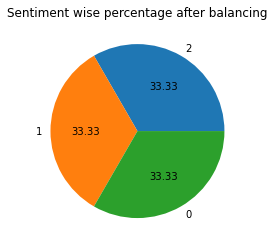

In [49]:
#plotting pie chart for rating on percentage
import matplotlib.pyplot as plt
plt.title('Sentiment wise percentage after balancing')
plt.pie(ynew4.value_counts(),labels=[2,1,0],autopct='%0.2f')

### data validation method

In [78]:
#Decing the data validation method first using train test split
results_log= []
for i in (0.1,0.18,0.19,0.2,0.3,0.4,0.5):
    xtrain,xtest,ytrain,ytest = train_test_split(xnew4,ynew4,test_size=i,random_state=5)
    log = LogisticRegression(max_iter=4000)
    log_model = log.fit(xtrain,ytrain)
    ypred_log= log_model.predict(xtest)
    result1= accuracy_score(ytest,ypred_log)
    results_log.append(result1)
results_log
#As we are getting highest accuracy for the 0.3 test_size we are choosing the same 

[0.8216374269005848,
 0.8094462540716613,
 0.8166409861325116,
 0.8199121522693997,
 0.8232421875,
 0.8095238095238095,
 0.809495896834701]

In [79]:
test = [0.1,0.18,0.19,0.2,0.3,0.4,0.5]
Best_test_size =pd.DataFrame(test)
Best_test_size["test_accuracy"] = results_log
Best_test_size= Best_test_size.rename(columns={0:"test_size"})
Best_test_size

,test_size,test_accuracy
0,0.10,0.821637
1,0.18,0.809446
2,0.19,0.816641
3,0.20,0.819912
4,0.30,0.823242
5,0.40,0.809524
6,0.50,0.809496


In [81]:
log = LogisticRegression(max_iter=5000)
cs_results=[]
for i in range(3,17):
    results = cross_val_score(log,xnew4,ynew4,cv=i).mean()
    results=results*100
    cs_results.append(results)
cs_results

[81.0905892700088,
 82.70392676496651,
 82.76265226295926,
 83.26118839575236,
 83.55474178764986,
 83.78893580059594,
 84.22749926707709,
 83.8174615424191,
 84.46294707263486,
 83.87725475660983,
 84.05285684622753,
 84.11325064330529,
 84.1991910760749,
 84.43341121495327]

In [82]:
split = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
Best_cross_value =pd.DataFrame(split)
Best_cross_value["test_accuracy"] = cs_results
Best_cross_value= Best_cross_value.rename(columns={0:"cross_value"})
Best_cross_value

,cross_value,test_accuracy
0,3,81.090589
1,4,82.703927
2,5,82.762652
3,6,83.261188
4,7,83.554742
5,8,83.788936
6,9,84.227499
7,10,83.817462
8,11,84.462947
9,12,83.877255


In [83]:
#so we are getting highest accuracy using cross validation so we are choosing cross validation for data validation

In [94]:
#using naive bayes model
nb = GaussianNB()
results_nb = cross_val_score(nb,xnew4.toarray(),ynew4,cv=11).mean()
print(results_nb)
#so we are getting around 71% accuracy for this naive bayes model

0.7047430010089485


In [50]:
#using logistic regression model
log = LogisticRegression(max_iter=5000)
results_log = cross_val_score(log,xnew4.toarray(),ynew4,cv=11).mean()
print(results_log)
#so we are getting around 84% accuracy for this logistic regression model

0.8446294707263486


In [96]:
#using decision tree classifier model
dt = DecisionTreeClassifier()
results_dt = cross_val_score(dt,xnew4.toarray(),ynew4,cv=11).mean()
print(results_dt)
#so we are getting around 75% accuracy for this decision tree model

0.7532102478995953


In [97]:
#using multinominal naive bayes model
mnb = MultinomialNB()
results_mnb = cross_val_score(mnb,xnew4.toarray(),ynew4,cv=11).mean()
print(results_mnb)
#so we are getting around 81% accuracy for this multinominal naive bayes model

0.8126665472272774


In [98]:
column_names = ["naive_bayes","logistic_regression","decision_tree","multinominal_naivebayes"]
test_accuracy =[results_nb,results_log,results_dt,results_mnb]
Accuracy_comparison= pd.DataFrame(column_names)
Accuracy_comparison['test_accuracy'] = test_accuracy
Accuracy_comparison= Accuracy_comparison.rename(columns={0:'Model_Name'})
Accuracy_comparison

,Model_Name,test_accuracy
0,naive_bayes,0.704743
1,logistic_regression,0.844629
2,decision_tree,0.753210
3,multinominal_naivebayes,0.812667


## hyperparameter tuning

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(xnew4,ynew4,test_size=0.3,random_state=5)

In [79]:
param_grid = {'C': np.logspace(-4, 4, 100),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0,max_iter=5000), param_grid,cv=11, verbose=0,n_jobs=-1)
best_model = clf.fit(xtrain,ytrain)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(xtest,ytest))

LogisticRegression(C=138.48863713938746, max_iter=5000, random_state=0)
The mean accuracy of the model is: 0.8486328125


In [67]:
best_model.best_params_

{'C': 339.3221771895323, 'penalty': 'l2'}

In [71]:
log3= LogisticRegression(penalty='l2',max_iter=5000,C=339.3221771895323)
logmodel3= log3.fit(xtrain,ytrain)
ypredlog3 = logmodel3.predict(xtest)
accuracy_score(ytest,ypredlog3)

0.8486328125

In [74]:
print(classification_report(ytest,ypredlog3))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       345
           1       0.84      0.97      0.90       341
           2       0.90      0.70      0.78       338

    accuracy                           0.85      1024
   macro avg       0.85      0.85      0.84      1024
weighted avg       0.85      0.85      0.84      1024



In [78]:
np.logspace(-4,4,100)

array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
      

## model deployment

In [66]:
#Saving the model

#importing the libraries
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle

#Data collection using amazon review exporter

earphone= pd.read_csv('Reviews_Earphone.csv')
earphone

messages = earphone.copy()

#Text preprocessing

lematizer = WordNetLemmatizer()
corpus =[]
for i in range(len(earphone.Text)):
    review = re.sub('[^a-zA-Z]',' ',earphone.Text[i])
    review = review.lower()
    review = review.split()
    review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

earphone['Text'] =pd.DataFrame(corpus)

#Forming sentiment column based on the rating given
a1=[]
for i in range(len(earphone.Rating)):
    if earphone.Rating[i]==1:
        a1.append("Negative")
    elif earphone.Rating[i]==2:
        a1.append("Negative")
    elif earphone.Rating[i]==3:
        a1.append("Neutral")
    elif earphone.Rating[i]==4:
        a1.append("Positive")
    else:
        a1.append("Positive")

earphone["sentiment"]=pd.DataFrame(a1)

earphone.sentiment.value_counts()

#Label encoding and balancing the data i.e. doing EDA

label_encoder = LabelEncoder()
earphone['sentiment']=label_encoder.fit_transform(earphone.sentiment)

#sentiment based on rating
earphone.sentiment.value_counts() #2 for positive, 0 for negative and 1 for neutral

## text to numbers

## Model using tfidf vectorizer

tfidf = TfidfVectorizer()
x= tfidf.fit_transform(earphone.Text)
x

y = earphone.sentiment
y

y.value_counts()

### balancing the data

y.value_counts()

## using oversampling method

from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=15)

xnew4,ynew4=sm.fit_resample(x,y)

ynew4.value_counts()


## Logistic regression model chooosen based on hyperparameter tuning

#train test split
xtrain,xtest,ytrain,ytest = train_test_split(xnew4,ynew4,test_size=0.3,random_state=5)

#Model building
log125= LogisticRegression(penalty='l2',max_iter=5000,C=339.3221771895323)
logmodel125= log125.fit(xtrain,ytrain)
ypredlog125 = logmodel125.predict(xtest)
accuracy_score(ytest,ypredlog125)

#saving the model
filename = 'logmodel125.sav'
pickle.dump(logmodel125,open(filename,'wb'))

#loading the model
loadmodel125= pickle.load(open(filename,'rb'))
result = loadmodel125.score(xtest,ytest)
print(result)

0.8486328125


In [13]:
# loading the model

#importing the libraries
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle
import streamlit as st

#Data collection

earphone= pd.read_csv('Reviews_Earphone.csv')

st.title("NLP P125 MODEL")
st.write(earphone.Text)

messages = earphone.copy()

#Text preprocessing

lematizer = WordNetLemmatizer()
corpus =[]
for i in range(len(earphone.Text)):
    review = re.sub('[^a-zA-Z]',' ',earphone.Text[i])
    review = review.lower()
    review = review.split()
    review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

earphone['Text'] =pd.DataFrame(corpus)

## text to numbers

## Model using tfidf vectorizer

tfidf = TfidfVectorizer()
x= tfidf.fit_transform(earphone.Text)
x

#loading the model
filename = 'logmodel125.sav'
loadmodel125= pickle.load(open(filename,'rb'))
predictions =loadmodel125.predict(x)
print(predictions)
st.subheader('predictions')
st.write(pd.concat([messages.Text,pd.DataFrame(predictions)],axis=1))
predi_probability = loadmodel125.predict_proba(x)
st.subheader('prediction probability')
st.write(predi_probability)

nlp125output = pd.concat([messages.Text,pd.DataFrame(predictions)],axis=1)
nlp125output.to_excel('nlp125output.xlsx')

[0 2 2 ... 2 2 2]


In [57]:
# loading the model trial version

#importing the libraries
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle
import streamlit as st

#Data collection


earphone= pd.read_csv('trialp125.csv')

st.title("NLP P125 MODEL")
st.write(earphone.Text)

messages = earphone.copy()

#Text preprocessing

lematizer = WordNetLemmatizer()
corpus =[]
for i in range(len(earphone.Text)):
    review = re.sub('[^a-zA-Z]',' ',earphone.Text[i])
    review = review.lower()
    review = review.split()
    review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

earphone['Text'] =pd.DataFrame(corpus)

## text to numbers

## Model using tfidf vectorizer

x= tfidf.transform(earphone.Text)
x

#loading the model
filename = 'logmodel125.sav'
loadmodel125= pickle.load(open(filename,'rb'))
predictions =loadmodel125.predict(x)
print(predictions)
st.subheader('predictions')
st.write(pd.concat([messages.Text,pd.DataFrame(predictions)],axis=1))
predi_probability = loadmodel125.predict_proba(x)
st.subheader('prediction probability')
st.write(predi_probability)

nlp125outputtrial = pd.concat([messages.Text,pd.DataFrame(predictions)],axis=1)
nlp125outputtrial.to_excel('nlp125outputtrial.xlsx')

[2 0 2]


### Do it on small scale to understand how it works

In [69]:
a= {"Class":["it is very very bad","all is well","this product is having amazing features"]}
b= pd.DataFrame(a)

In [52]:
x2= tfidf.transform(b.Class)
x2

<3x3513 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [53]:
logmodel125.predict(x2)

array([0, 2, 2])

In [54]:
#As this is predicting the sentences for the small objects after doing transform only

In [59]:
tfidf.transform(b.Class)

<3x3513 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

### tfidf vectorizer saving

In [63]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(earphone.Text)

<2005x3513 sparse matrix of type '<class 'numpy.float64'>'
	with 25386 stored elements in Compressed Sparse Row format>

In [70]:
tfidf.transform(b.Class)

<3x3513 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [72]:
#saving the tfidf
filename2 = 'tfidf125.sav'
pickle.dump(tfidf,open(filename2,'wb'))

## new saving of the model

In [1]:
#Saving the model

#importing the libraries
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle

#Data collection using amazon review exporter

earphone= pd.read_csv('Reviews_Earphone.csv')
earphone

messages = earphone.copy()

#Text preprocessing

lematizer = WordNetLemmatizer()
corpus =[]
for i in range(len(earphone.Text)):
    review = re.sub('[^a-zA-Z]',' ',earphone.Text[i])
    review = review.lower()
    review = review.split()
    review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

earphone['Text'] =pd.DataFrame(corpus)

#Forming sentiment column based on the rating given
a1=[]
for i in range(len(earphone.Rating)):
    if earphone.Rating[i]==1:
        a1.append("Negative")
    elif earphone.Rating[i]==2:
        a1.append("Negative")
    elif earphone.Rating[i]==3:
        a1.append("Neutral")
    elif earphone.Rating[i]==4:
        a1.append("Positive")
    else:
        a1.append("Positive")

earphone["sentiment"]=pd.DataFrame(a1)

earphone.sentiment.value_counts()

#Label encoding and balancing the data i.e. doing EDA

label_encoder = LabelEncoder()
earphone['sentiment']=label_encoder.fit_transform(earphone.sentiment)

#sentiment based on rating
earphone.sentiment.value_counts() #2 for positive, 0 for negative and 1 for neutral

## text to numbers

## Model using tfidf vectorizer

tfidf = TfidfVectorizer()
x= tfidf.fit_transform(earphone.Text)
x

y = earphone.sentiment
y

y.value_counts()

### balancing the data

y.value_counts()

## using oversampling method

from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=15)

xnew4,ynew4=sm.fit_resample(x,y)

ynew4.value_counts()


## Logistic regression model chooosen based on hyperparameter tuning

#train test split
xtrain,xtest,ytrain,ytest = train_test_split(xnew4,ynew4,test_size=0.3,random_state=5)

#Model building
log125= LogisticRegression(penalty='l2',max_iter=5000,C=339.3221771895323)
logmodel125= log125.fit(xtrain,ytrain)
ypredlog125 = logmodel125.predict(xtest)
accuracy_score(ytest,ypredlog125)

#saving the model
filename = 'logmodel125.sav'
pickle.dump(logmodel125,open(filename,'wb'))

#saving the tfidf
filename2 = 'tfidf125.sav'
pickle.dump(tfidf,open(filename2,'wb'))


#loading the model
loadmodel125= pickle.load(open(filename,'rb'))
result = loadmodel125.score(xtest,ytest)
print(result)

0.8486328125


In [39]:
# loading the model trial version

#importing the libraries
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle
import streamlit as st

#Data collection


earphone= pd.read_csv('trialp125.csv')

st.title("NLP P125 MODEL")
st.subheader("Input parameters")
st.write(earphone.Text)

messages = earphone.copy()

#Text preprocessing

lematizer = WordNetLemmatizer()
corpus =[]
for i in range(len(earphone.Text)):
    review = re.sub('[^a-zA-Z]',' ',str(earphone.Text[i]))
    review = review.lower()
    review = review.split()
    review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

earphone['Text'] =pd.DataFrame(corpus)

## text to numbers

## Model using tfidf vectorizer
## load the tfidf vectorizer
filename2 = 'tfidf125.sav'
loadtfidf = pickle.load(open(filename2,'rb'))
x= loadtfidf.transform(earphone.Text)
x

#loading the model
filename = 'logmodel125.sav'
loadmodel125= pickle.load(open(filename,'rb'))
predictions =loadmodel125.predict(x)
print(predictions)
st.subheader('predictions')

a1=[]
for i in range(len(predictions)):
    if predictions[i]==2:
        a1.append("Positive")
    elif predictions[i]==0:
        a1.append("Negative")
    elif predictions[i]==1:
        a1.append("Neutral")

output= pd.concat([messages.Text,pd.DataFrame(predictions)],axis=1)
output["sentiment"] = pd.DataFrame(a1)
output=output.rename(columns={0:"sentiment_value"})

st.write(output)
predi_probability = loadmodel125.predict_proba(x)
st.subheader('prediction probability')
st.write(predi_probability)

nlp125outputtrial = output
nlp125outputtrial.to_excel('nlp125outputtrial.xlsx')

[2 0 2 1 0]


In [90]:
## for the new text large reviews
# loading the model trial version

#importing the libraries
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle
import streamlit as st

#Data collection


earphone= pd.read_csv('Earphones_reviews.csv')

st.title("NLP P125 MODEL")
st.subheader("Input text")
st.write(earphone.text)

messages = earphone.copy()

#Text preprocessing

lematizer = WordNetLemmatizer()
corpus =[]
for i in range(len(earphone.text)):
    review = re.sub('[^a-zA-Z]',' ',str(earphone.text[i]))
    review = review.lower()
    review = review.split()
    review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

earphone['text'] =pd.DataFrame(corpus)

## text to numbers

## Model using tfidf vectorizer
## load the tfidf vectorizer
filename2 = 'tfidf125.sav'
loadtfidf = pickle.load(open(filename2,'rb'))
x= loadtfidf.transform(earphone.text)
x

#loading the model
filename = 'logmodel125.sav'
loadmodel125= pickle.load(open(filename,'rb'))
predictions =loadmodel125.predict(x)
print(predictions)
st.subheader('predictions')
st.write(pd.concat([messages.text,pd.DataFrame(predictions)],axis=1))
predi_probability = loadmodel125.predict_proba(x)
st.subheader('prediction probability')
st.write(predi_probability)

nlp125outputtrial2 = pd.concat([messages.text,pd.DataFrame(predictions)],axis=1)
nlp125outputtrial2.to_excel('nlp125outputtrial2.xlsx')

[0 2 2 ... 1 1 2]


### Custom text input to model

In [3]:
## Sample trial version
import streamlit as st
from textblob import TextBlob
def main():
    st.title("Sentiment Analysis NLP App")
    st.subheader("Streamlit Projects")

    menu = ["Home","About"]
    choice = st.sidebar.selectbox("Menu",menu)

    if choice == "Home":
        st.subheader("Home")
        with st.form(key='nlpForm'):
            raw_text = st.text_area("Enter Text Here")
            submit_button = st.form_submit_button(label='Analyze')

        # layout
        col1,col2 = st.columns(2)
        if submit_button:

            with col1:
                st.info("Results")
                sentiment = TextBlob(raw_text).sentiment
                st.write(sentiment)

                # Emoji
                if sentiment.polarity > 0:
                    st.markdown("Sentiment:: Positive :smiley: ")
                elif sentiment.polarity < 0:
                    st.markdown("Sentiment:: Negative :angry: ")
                else:
                    st.markdown("Sentiment:: Neutral 😐 ")
                    
                    
                # Dataframe
                result_df = convert_to_df(sentiment)
                st.dataframe(result_df)

                # Visualization
                c = alt.Chart(result_df).mark_bar().encode(
                    x='metric',
                    y='value',
                    color='metric')
                st.altair_chart(c,use_container_width=True)



            with col2:
                st.info("Token Sentiment")

                token_sentiments = analyze_token_sentiment(raw_text)
                st.write(token_sentiments)






    else:
        st.subheader("About")


if __name__ == '__main__':
    main()

2022-07-06 10:49:12.602 
  command:

    streamlit run C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
# loading the custom input version

#importing the libraries
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle
import streamlit as st


def main():
    st.title("NLP SENTIMENT ANALYSIS")
    st.subheader("Streamlit Project P125")

    menu = ["Home","About"]
    choice = st.sidebar.selectbox("Menu",menu)

    if choice == "Home":
        st.subheader("Home")
        with st.form(key='nlpForm'):
            raw_text = st.text_area("Enter Text Here")
            submit_button = st.form_submit_button(label='Analyze')

        # layout
        col1,col2= st.columns(2)
        if submit_button:

            with col1:
                st.info("Results")
                lematizer = WordNetLemmatizer()
                corpus=[]
                review= re.sub('[^a-zA-Z]',' ',str(raw_text))
                review= review.lower()
                review = review.split()
                review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
                review = ' '.join(review)
                corpus.append(review)
                
                ## text to numbers

                ## Model using tfidf vectorizer
                ## load the tfidf vectorizer
                filename2 = 'tfidf125.sav'
                loadtfidf = pickle.load(open(filename2,'rb'))
                x= loadtfidf.transform(corpus)

                
                #loading the model
                filename = 'logmodel125.sav'
                loadmodel125= pickle.load(open(filename,'rb'))
                predictions =loadmodel125.predict(x)
                print(predictions)
                st.subheader('predictions')
                
                b= {"Raw Text":raw_text,"sentiment_value":predictions}
                c=pd.DataFrame(b)
                st.write(c)
                
                # Emoji
                if predictions==2:
                    st.markdown("Sentiment:: Positive :smiley: ")
                elif predictions==0:
                    st.markdown("Sentiment:: Negative :angry: ")
                else:
                    st.markdown("Sentiment:: Neutral 😐 ")
                    
                    









    else:
        st.subheader("About")
        st.write("In this project we are giving reviews of product in text format to the model and Model is built in such a way which can Extract and Classify sentiment of the reviews on a product into positive, negative and neutral category.")


if __name__ == '__main__':
    main()


In [1]:
# loading the model trial version

#importing the libraries
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle
import streamlit as st

#Data collection


earphone= pd.read_csv('Earphones_reviews.csv')

st.title("NLP P125 MODEL")
st.subheader("Input parameters")
st.write(earphone.Text)

messages = earphone.copy()

#Text preprocessing

lematizer = WordNetLemmatizer()
corpus =[]
for i in range(len(earphone.Text)):
    review = re.sub('[^a-zA-Z]',' ',str(earphone.Text[i]))
    review = review.lower()
    review = review.split()
    review = [lematizer.lemmatize(word) for word in review if word not in (stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

earphone['Text'] =pd.DataFrame(corpus)

## text to numbers

## Model using tfidf vectorizer
## load the tfidf vectorizer
filename2 = 'tfidf125.sav'
loadtfidf = pickle.load(open(filename2,'rb'))
x= loadtfidf.transform(earphone.Text)
x

#loading the model
filename = 'logmodel125.sav'
loadmodel125= pickle.load(open(filename,'rb'))
predictions =loadmodel125.predict(x)
print(predictions)
st.subheader('predictions')

a1=[]
for i in range(len(predictions)):
    if predictions[i]==2:
        a1.append("Positive")
    elif predictions[i]==0:
        a1.append("Negative")
    elif predictions[i]==1:
        a1.append("Neutral")

output= pd.concat([messages.Text,pd.DataFrame(predictions)],axis=1)
output["sentiment"] = pd.DataFrame(a1)
output=output.rename(columns={0:"sentiment_value"})

st.write(output)
predi_probability = loadmodel125.predict_proba(x)
st.subheader('prediction probability')
st.write(predi_probability)

nlp125outputtrial = output
nlp125outputtrial.to_excel('nlp125outputtrial.xlsx')

2022-07-07 07:53:41.322 
  command:

    streamlit run C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


[0 2 2 ... 1 1 2]


In [3]:
output.sentiment.value_counts()

Positive    1031
Negative     719
Neutral      250
Name: sentiment, dtype: int64